# **Analyzing the Determinants of Happiness Across Countries from 2015 to 2019**


---



# Importing Libraries and Loading Data

First, we need to import the necessary libraries and load the datasets into pandas DataFrames.

In [5]:
import pandas as pd

# Load datasets
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')
df_2018 = pd.read_csv('2018.csv')
df_2019 = pd.read_csv('2019.csv')

# Display the first few rows of each dataset to ensure they are loaded correctly
print("2015 Data:")
print(df_2015.head())
print("\n2016 Data:")
print(df_2016.head())
print("\n2017 Data:")
print(df_2017.head())
print("\n2018 Data:")
print(df_2018.head())
print("\n2019 Data:")
print(df_2019.head())

2015 Data:
       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938

# Data Cleaning and Preprocessing

I'll start by examining the columns in each dataset to identify any discrepancies or missing values that need to be addressed.

In [6]:
# Check columns and data types for each dataset
print("2015 Data Columns and Types:")
print(df_2015.info())
print("\n2016 Data Columns and Types:")
print(df_2016.info())
print("\n2017 Data Columns and Types:")
print(df_2017.info())
print("\n2018 Data Columns and Types:")
print(df_2018.info())
print("\n2019 Data Columns and Types:")
print(df_2019.info())

# Check for missing values in each dataset
print("\nMissing Values in 2015 Data:")
print(df_2015.isnull().sum())
print("\nMissing Values in 2016 Data:")
print(df_2016.isnull().sum())
print("\nMissing Values in 2017 Data:")
print(df_2017.isnull().sum())
print("\nMissing Values in 2018 Data:")
print(df_2018.isnull().sum())
print("\nMissing Values in 2019 Data:")
print(df_2019.isnull().sum())

2015 Data Columns and Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(

Based on the results, we can see that the only dataset with missing values is the 2018 dataset, which has one missing value in the "Perceptions of corruption" column. All other datasets are complete.



# Handling Missing Values

We'll handle the missing value in the 2018 dataset by filling it with the mean of the column since we are dealing dealing with a small number of missing values.

In [7]:
# Fill missing value in 'Perceptions of corruption' column in the 2018 dataset
df_2018['Perceptions of corruption'].fillna(df_2018['Perceptions of corruption'].mean(), inplace=True)

# Verify that there are no more missing values
print("\nMissing Values in 2018 Data after filling:")
print(df_2018.isnull().sum())



Missing Values in 2018 Data after filling:
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


# Data Consistency and Merging

Since the datasets from different years have some variations in column names and structures, we need to standardize the column names to ensure consistency. Then, we'll merge the datasets into a single DataFrame for easier analysis.

In [11]:
import pandas as pd

# Load datasets
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')
df_2018 = pd.read_csv('2018.csv')
df_2019 = pd.read_csv('2019.csv')

# Standardize column names across all datasets
df_2015.columns = ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error',
                   'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom',
                   'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

df_2016.columns = ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval',
                   'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
                   'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

df_2017.columns = ['Country', 'Happiness Rank', 'Happiness Score', 'Whisker High', 'Whisker Low',
                   'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom',
                   'Generosity', 'Trust (Government Corruption)', 'Dystopia Residual']

df_2018.columns = ['Happiness Rank', 'Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
                   'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']

df_2019.columns = ['Happiness Rank', 'Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
                   'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']

# Add a Year column to each dataframe
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019

# Select the common columns for merging, excluding 'Dystopia Residual' for 2018 and 2019
common_columns = ['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
                  'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity',
                  'Trust (Government Corruption)', 'Year']

# Keep only the common columns in each dataframe
df_2015 = df_2015[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
                   'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity',
                   'Trust (Government Corruption)', 'Dystopia Residual', 'Year']]

df_2016 = df_2016[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
                   'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity',
                   'Trust (Government Corruption)', 'Dystopia Residual', 'Year']]

df_2017 = df_2017[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
                   'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity',
                   'Trust (Government Corruption)', 'Dystopia Residual', 'Year']]

# For 2018 and 2019, we exclude 'Dystopia Residual'
df_2018 = df_2018[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
                   'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity',
                   'Trust (Government Corruption)', 'Year']]

df_2019 = df_2019[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
                   'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity',
                   'Trust (Government Corruption)', 'Year']]

# Merge the datasets
df_combined = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], ignore_index=True)

# Display the first few rows of the combined dataframe
print("Combined Data:")
print(df_combined.head())




Combined Data:
       Country  Happiness Rank  Happiness Score  Economy (GDP per Capita)  \
0  Switzerland               1            7.587                   1.39651   
1      Iceland               2            7.561                   1.30232   
2      Denmark               3            7.527                   1.32548   
3       Norway               4            7.522                   1.45900   
4       Canada               5            7.427                   1.32629   

    Family  Health (Life Expectancy)  Freedom  Generosity  \
0  1.34951                   0.94143  0.66557     0.29678   
1  1.40223                   0.94784  0.62877     0.43630   
2  1.36058                   0.87464  0.64938     0.34139   
3  1.33095                   0.88521  0.66973     0.34699   
4  1.32261                   0.90563  0.63297     0.45811   

   Trust (Government Corruption)  Dystopia Residual  Year  
0                        0.41978            2.51738  2015  
1                        0.14145   

# Exploratory Data Analysis (EDA)

I'll  perform exploratory data analysis to understand the data better. I'll start with getting a summary of the statistics for numerical columns. Then, we'll visualize the distribution of the Happiness Score over the years. Finishing with Analyzing the correlation between different factors and the Happiness Score.

Summary Statistics

In [12]:
# Summary statistics for numerical columns
print("Summary Statistics:")
print(df_combined.describe())


Summary Statistics:
       Happiness Rank  Happiness Score  Economy (GDP per Capita)      Family  \
count      782.000000       782.000000                782.000000  782.000000   
mean        78.698210         5.379018                  0.916047    1.078392   
std         45.182384         1.127456                  0.407340    0.329548   
min          1.000000         2.693000                  0.000000    0.000000   
25%         40.000000         4.509750                  0.606500    0.869363   
50%         79.000000         5.322000                  0.982205    1.124735   
75%        118.000000         6.189500                  1.236187    1.327250   
max        158.000000         7.769000                  2.096000    1.644000   

       Health (Life Expectancy)     Freedom  Generosity  \
count                782.000000  782.000000  782.000000   
mean                   0.612416    0.411091    0.218576   
std                    0.248309    0.152880    0.122321   
min                    

Distribution of Happiness Scores Over the Years

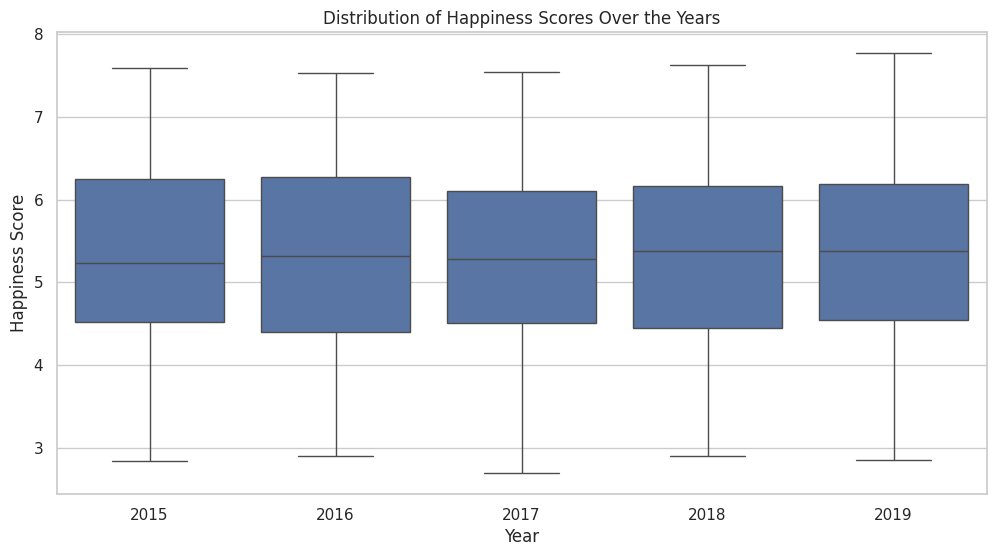

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Plot the distribution of Happiness Scores over the years
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Happiness Score', data=df_combined)
plt.title('Distribution of Happiness Scores Over the Years')
plt.show()


Correlation Analysis

Correlation Matrix:
                               Happiness Rank  Happiness Score  \
Happiness Rank                       1.000000        -0.992066   
Happiness Score                     -0.992066         1.000000   
Economy (GDP per Capita)            -0.794791         0.789284   
Family                              -0.644842         0.648799   
Health (Life Expectancy)            -0.743655         0.742456   
Freedom                             -0.537942         0.551258   
Generosity                          -0.117713         0.137578   
Trust (Government Corruption)       -0.372781         0.398418   
Dystopia Residual                   -0.482706         0.489747   
Year                                -0.007768         0.007065   

                               Economy (GDP per Capita)    Family  \
Happiness Rank                                -0.794791 -0.644842   
Happiness Score                                0.789284  0.648799   
Economy (GDP per Capita)                      

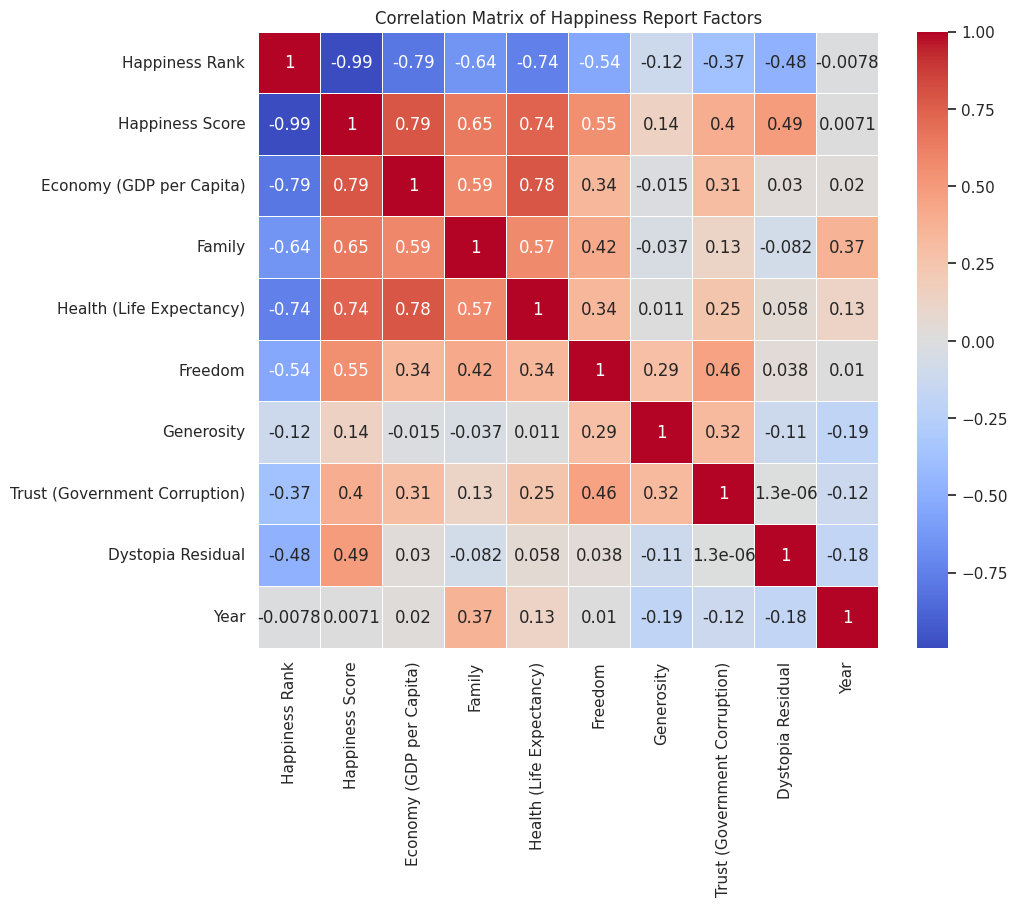

In [15]:
# Calculate the correlation matrix, excluding non-numeric columns
numeric_df = df_combined.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Happiness Report Factors')
plt.show()



# Linear Regression Analysis

I'll use the scikit-learn library to build a linear regression model predicting the Happiness Score based on other factors.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target variable
features = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom',
            'Generosity', 'Trust (Government Corruption)', 'Dystopia Residual']
target = 'Happiness Score'

# Prepare the data
X = df_combined[features].fillna(0)  # Filling NaN values with 0 for simplicity
y = df_combined[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Display model coefficients
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print(coefficients)


Mean Squared Error: 0.2584203445271771
R-squared: 0.7875493488306557
                               Coefficient
Economy (GDP per Capita)          0.690700
Family                            1.116944
Health (Life Expectancy)          1.402520
Freedom                           1.395214
Generosity                        0.107523
Trust (Government Corruption)     1.075039
Dystopia Residual                 0.275926


Visualization of Predictions

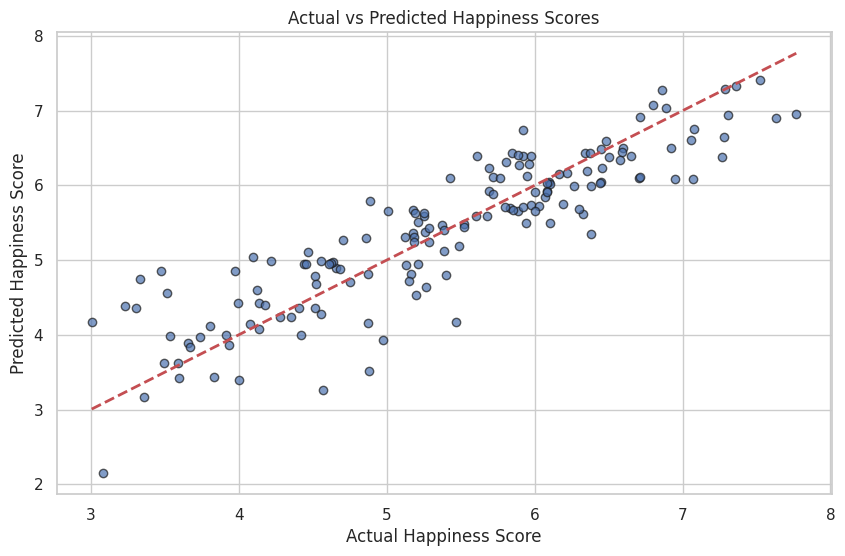

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', linewidth=2)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs Predicted Happiness Scores')
plt.show()

# Conclusion

Through this project, by performing comprehensive data analysis, starting from data loading and cleaning to exploratory analysis and building predictive models. I gained valuable insights into the factors that influence happiness across different countries and years.

**Key Findings:**
Economic factors, family support, health, freedom, and
trust in government are strong predictors of happiness.
Our linear regression model showed that these factors collectively explain a significant portion of the variation in Happiness Scores across countries.


This project showcases how the application of data science techniques could providing a clear example of how data can be leveraged to derive meaningful insights and build predictive models.
